In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
X=pd.read_csv("train.csv")

In [4]:
X

,ImageId,NameOfPokemon
0,296.jpg,Pikachu
1,297.jpg,Pikachu
2,298.jpg,Pikachu
3,299.jpg,Pikachu
4,300.jpg,Pikachu
...,...,...
299,616.jpg,Charmander
300,617.jpg,Charmander
301,618.jpg,Charmander
302,619.jpg,Charmander


In [15]:
X["ImageId"].values

array(['296.jpg', '297.jpg', '298.jpg', '299.jpg', '300.jpg', '301.jpg',
       '302.jpg', '303.jpg', '304.jpg', '305.jpg', '306.jpg', '307.jpg',
       '308.jpg', '309.jpg', '310.jpg', '311.jpg', '312.jpg', '313.jpg',
       '314.jpg', '315.jpg', '316.jpg', '317.jpg', '318.jpg', '319.jpg',
       '320.jpg', '321.jpg', '322.jpg', '323.jpg', '324.jpg', '325.jpg',
       '326.jpg', '327.jpg', '328.jpg', '329.jpg', '330.jpg', '331.jpg',
       '332.jpg', '333.jpg', '334.jpg', '335.jpg', '336.jpg', '337.jpg',
       '338.jpg', '339.jpg', '340.jpg', '341.jpg', '342.jpg', '343.jpg',
       '344.jpg', '345.jpg', '346.jpg', '347.jpg', '348.jpg', '349.jpg',
       '350.jpg', '351.jpg', '352.jpg', '353.jpg', '354.jpg', '355.jpg',
       '356.jpg', '357.jpg', '358.jpg', '359.jpg', '360.jpg', '361.jpg',
       '362.jpg', '363.jpg', '364.jpg', '365.jpg', '366.jpg', '367.jpg',
       '368.jpg', '369.jpg', '370.jpg', '371.jpg', '372.jpg', '373.jpg',
       '374.jpg', '375.jpg', '376.jpg', '377.jpg', 

In [6]:
import os,shutil

In [27]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes=["Pikachu","Bulbasaur","Charmander"]

In [29]:
for c in classes:
    p=os.path.join("val_images",c)
    if not os.path.isdir(p):
        os.mkdir(p)

In [30]:
SPLIT=0.8
for f in os.listdir("Images"):
    path="Images/"+f
    imgs=os.listdir(path)
    
    split_size=int(SPLIT*len(imgs))
    files_to_move=imgs[split_size:]
    
    for img_f in files_to_move:
        src=os.path.join(path,img_f)
        dest=os.path.join("val_images/"+f)
        shutil.move(src,dest)

In [31]:
for dirc in os.listdir("Images/"):
    p = "Images/" + dirc
    imgs = os.listdir(p)
    print(p , len(imgs))
print()
for dirc in os.listdir("val_images/"):
    p = "val_images/" + dirc
    imgs = os.listdir(p)
    print(p , len(imgs))

Images/Bulbasaur 80
Images/Charmander 81
Images/Pikachu 80

val_images/Bulbasaur 21
val_images/Charmander 21
val_images/Pikachu 21


In [45]:
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)      

In [47]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [35]:
from keras.preprocessing import image

In [36]:
train_gen=image.ImageDataGenerator(rescale=1.0/255.0,
                                  shear_range=0.2,
                                    zoom_range=0.2,
                                    vertical_flip=True,
                                    width_shift_range=0.2,
                                    horizontal_flip=True)

val_gen=image.ImageDataGenerator(rescale=1.0/255.0)

In [37]:
train_generator=train_gen.flow_from_directory("Images/",
                                             target_size=(224,224),
                                             batch_size=8,
                                             class_mode='categorical',
                                             shuffle=True)

Found 241 images belonging to 3 classes.


In [38]:
val_generator=train_gen.flow_from_directory("val_images/",
                                             target_size=(224,224),
                                             batch_size=8,
                                             class_mode='categorical',
                                             shuffle=True)

Found 63 images belonging to 3 classes.


In [39]:

x, y = train_generator.next()


In [40]:
x.shape

(8, 224, 224, 3)

In [41]:
y.shape

(8, 3)

In [42]:
hist=model.fit_generator?

In [48]:
hist=model.fit_generator(train_generator,
                        steps_per_epoch=38,
                        epochs=10,
                        validation_data=val_generator,
                        validation_steps=8)

Epoch 1/10
12/38 [========>.....................] - ETA: 21s - loss: 4.0153 - accuracy: 0.3146

c:\users\bhagesh\appdata\local\programs\python\python37\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


38/38 [==============================] - 34s 886ms/step - loss: 1.9845 - accuracy: 0.4007 - val_loss: 1.1934 - val_accuracy: 0.3651
Epoch 2/10
38/38 [==============================] - 32s 846ms/step - loss: 0.6815 - accuracy: 0.7241 - val_loss: 0.7577 - val_accuracy: 0.7460
Epoch 3/10
38/38 [==============================] - 32s 852ms/step - loss: 0.3931 - accuracy: 0.8586 - val_loss: 1.0645 - val_accuracy: 0.6984
Epoch 4/10
38/38 [==============================] - 32s 847ms/step - loss: 0.2839 - accuracy: 0.8923 - val_loss: 0.9321 - val_accuracy: 0.8730
Epoch 5/10
38/38 [==============================] - 33s 874ms/step - loss: 0.2429 - accuracy: 0.9125 - val_loss: 1.7225 - val_accuracy: 0.8889
Epoch 6/10
38/38 [==============================] - 32s 836ms/step - loss: 0.1890 - accuracy: 0.9448 - val_loss: 0.3975 - val_accuracy: 0.8254
Epoch 7/10
38/38 [==============================] - 32s 855ms/step - loss: 0.1141 - accuracy: 0.9697 - val_loss: 1.6599 - val_accuracy: 0.9206
Epoch 8/10

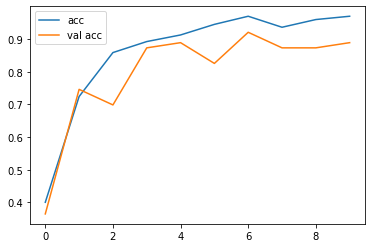

In [54]:
plt.plot(hist.history['accuracy'],label="acc")
plt.plot(hist.history['val_accuracy'],label="val acc")
plt.legend()
plt.show()

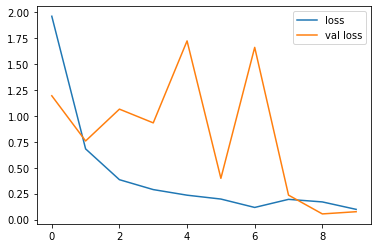

In [53]:

plt.plot(hist.history['loss'],label="loss")
plt.plot(hist.history['val_loss'],label="val loss")
plt.legend()
plt.show()

In [56]:

model.evaluate_generator(val_generator, steps=8)

[1.020305871963501, 0.8730158805847168]

In [57]:
model.evaluate_generator(train_generator, steps=38)

c:\users\bhagesh\appdata\local\programs\python\python37\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[0.014257099479436874, 0.9730639457702637]

In [58]:
X_test=pd.read_csv("test.csv")

In [59]:
X_test

,ImageId
0,1106.jpg
1,2236.jpg
2,1131.jpg
3,2221.jpg
4,2011.jpg
...,...
118,1124.jpg
119,2014.jpg
120,2235.jpg
121,1126.jpg


In [60]:
X_test["ImageId"].loc[0]

'1106.jpg'

In [61]:
X_test=np.array(X_test)

In [62]:
X_test

array([['1106.jpg'],
       ['2236.jpg'],
       ['1131.jpg'],
       ['2221.jpg'],
       ['2011.jpg'],
       ['2030.jpg'],
       ['2035.jpg'],
       ['1110.jpg'],
       ['1104.jpg'],
       ['2217.jpg'],
       ['1111.jpg'],
       ['1100.jpg'],
       ['1112.jpg'],
       ['1138.jpg'],
       ['2238.jpg'],
       ['2009.jpg'],
       ['2225.jpg'],
       ['2240.jpg'],
       ['2020.jpg'],
       ['2209.jpg'],
       ['2029.jpg'],
       ['1114.jpg'],
       ['2201.jpg'],
       ['1118.jpg'],
       ['2025.jpg'],
       ['2202.jpg'],
       ['1117.jpg'],
       ['1119.jpg'],
       ['2000.jpg'],
       ['2007.jpg'],
       ['2039.jpg'],
       ['2017.jpg'],
       ['2215.jpg'],
       ['1120.jpg'],
       ['2006.jpg'],
       ['1116.jpg'],
       ['1128.jpg'],
       ['1125.jpg'],
       ['2203.jpg'],
       ['1133.jpg'],
       ['1137.jpg'],
       ['2220.jpg'],
       ['2012.jpg'],
       ['2224.jpg'],
       ['2206.jpg'],
       ['1122.jpg'],
       ['2223.jpg'],
       ['1102

In [90]:
pokemon=[]

In [66]:
imgg=image.load_img("Test Images/1100.jpg", target_size=(224,224,3))

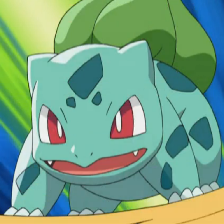

In [67]:
imgg

In [69]:
imgg = image.img_to_array(imgg)
imgg = np.expand_dims(imgg, axis=0)

In [74]:
imgg

array([[1., 0., 0.]], dtype=float32)

In [75]:
train_generator.class_indices

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}

In [85]:
X_test=X_test.reshape((-1,))

In [86]:
X_test

array(['1106.jpg', '2236.jpg', '1131.jpg', '2221.jpg', '2011.jpg',
       '2030.jpg', '2035.jpg', '1110.jpg', '1104.jpg', '2217.jpg',
       '1111.jpg', '1100.jpg', '1112.jpg', '1138.jpg', '2238.jpg',
       '2009.jpg', '2225.jpg', '2240.jpg', '2020.jpg', '2209.jpg',
       '2029.jpg', '1114.jpg', '2201.jpg', '1118.jpg', '2025.jpg',
       '2202.jpg', '1117.jpg', '1119.jpg', '2000.jpg', '2007.jpg',
       '2039.jpg', '2017.jpg', '2215.jpg', '1120.jpg', '2006.jpg',
       '1116.jpg', '1128.jpg', '1125.jpg', '2203.jpg', '1133.jpg',
       '1137.jpg', '2220.jpg', '2012.jpg', '2224.jpg', '2206.jpg',
       '1122.jpg', '2223.jpg', '1102.jpg', '2234.jpg', '2216.jpg',
       '2016.jpg', '2227.jpg', '2013.jpg', '1113.jpg', '2204.jpg',
       '1101.jpg', '2208.jpg', '2024.jpg', '2031.jpg', '2222.jpg',
       '2211.jpg', '2033.jpg', '2213.jpg', '2231.jpg', '2001.jpg',
       '2040.jpg', '1127.jpg', '2023.jpg', '2015.jpg', '1121.jpg',
       '2232.jpg', '1139.jpg', '1103.jpg', '2018.jpg', '2233.j

In [91]:
for f in X_test:
    print(f)
    imgg=image.load_img("Test Images/"+f, target_size=(224,224,3))
    imgg = image.img_to_array(imgg)
    imgg = np.expand_dims(imgg, axis=0)
    pokemon.append(model.predict(imgg))

1106.jpg
2236.jpg
1131.jpg
2221.jpg
2011.jpg
2030.jpg
2035.jpg
1110.jpg
1104.jpg
2217.jpg
1111.jpg
1100.jpg
1112.jpg
1138.jpg
2238.jpg
2009.jpg
2225.jpg
2240.jpg
2020.jpg
2209.jpg
2029.jpg
1114.jpg
2201.jpg
1118.jpg
2025.jpg
2202.jpg
1117.jpg
1119.jpg
2000.jpg
2007.jpg
2039.jpg
2017.jpg
2215.jpg
1120.jpg
2006.jpg
1116.jpg
1128.jpg
1125.jpg
2203.jpg
1133.jpg
1137.jpg
2220.jpg
2012.jpg
2224.jpg
2206.jpg
1122.jpg
2223.jpg
1102.jpg
2234.jpg
2216.jpg
2016.jpg
2227.jpg
2013.jpg
1113.jpg
2204.jpg
1101.jpg
2208.jpg
2024.jpg
2031.jpg
2222.jpg
2211.jpg
2033.jpg
2213.jpg
2231.jpg
2001.jpg
2040.jpg
1127.jpg
2023.jpg
2015.jpg
1121.jpg
2232.jpg
1139.jpg
1103.jpg
2018.jpg
2233.jpg
2212.jpg
2210.jpg
2228.jpg
2026.jpg
1132.jpg
2003.jpg
1129.jpg
2214.jpg
1123.jpg
2004.jpg
1136.jpg
1140.jpg
2226.jpg
2230.jpg
1135.jpg
1105.jpg
2237.jpg
1109.jpg
2022.jpg
2005.jpg
2218.jpg
2036.jpg
1115.jpg
2032.jpg
2200.jpg
1134.jpg
1130.jpg
1107.jpg
2034.jpg
2205.jpg
2008.jpg
2027.jpg
2028.jpg
2239.jpg
1108.jpg
2010.jpg
2

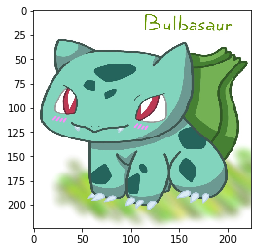

In [80]:
imgg=image.load_img("Test Images/"+"1106.jpg", target_size=(224,224,3))
plt.imshow(imgg)

In [92]:
pokemon

[array([[1., 0., 0.]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[0., 0., 1.]], dtype=float32),
 array([[0., 0., 1.]], dtype=float32),
 array([[0., 0., 1.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[0.0000000e+00, 1.0000000e+00, 2.2569243e-30]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[0., 0., 1.]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[0., 0., 1.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[0., 1., 0.]], dtype=float32),
 array([[1., 0., 0.]], dtype=float32),
 array([[0., 0., 1.]], dtype=fl

In [94]:
train_generator.class_indices

{'Bulbasaur': 0, 'Charmander': 1, 'Pikachu': 2}

In [136]:
d={0:"Bulbasaur",1:"Charmander",2:"Pikachu"}

In [101]:
pokemon=np.array(pokemon)

In [106]:
pokemon=pokemon.reshape(123,3)

In [103]:
pokemon

array([[[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],

       [[0.0000000e+00, 0.0000000e+00, 1.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[1.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.0000000e+00, 2.2569243e-30]],

       [[0.0000000e+00, 1.0000000e+00, 0.0000000e+00]],

       [[0.0000000e+00, 1.00000

In [130]:
pk=np.argmax(pokemon,axis=1)

In [112]:
pk=pk.reshape((-1,1))

In [131]:
pk

array([0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2], dtype=int64)

In [127]:
pk=np.array(pk)

array(['0', '1', '0', '1', '2', '2', '2', '0', '0', '1', '0', '0', '0',
       '0', '1', '1', '1', '1', '2', '1', '2', '0', '1', '0', '2', '1',
       '0', '2', '2', '2', '2', '2', '1', '0', '2', '0', '0', '0', '1',
       '0', '0', '1', '2', '1', '1', '0', '1', '0', '1', '1', '2', '1',
       '2', '0', '1', '0', '1', '2', '2', '1', '1', '2', '1', '2', '1',
       '2', '0', '2', '2', '0', '1', '2', '0', '2', '1', '1', '1', '1',
       '2', '0', '2', '0', '1', '0', '2', '0', '0', '1', '1', '0', '0',
       '1', '0', '1', '2', '1', '2', '0', '2', '1', '0', '0', '0', '2',
       '1', '2', '2', '2', '1', '0', '2', '1', '1', '2', '1', '2', '2',
       '2', '0', '2', '1', '0', '2'], dtype='<U21')

In [134]:
pk

array([0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2], dtype=int64)

In [135]:
pk

array([0, 1, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 1,
       1, 0, 1, 0, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2,
       0, 2, 2, 0, 1, 2, 0, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 2, 1, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 2], dtype=int64)

In [137]:
predpk=[d[x] for x in pk]

In [147]:
predpk=np.array(predpk)

In [148]:
predpk=predpk.reshape((-1,1))

In [149]:
predpk

array([['Bulbasaur'],
       ['Charmander'],
       ['Bulbasaur'],
       ['Charmander'],
       ['Pikachu'],
       ['Pikachu'],
       ['Pikachu'],
       ['Bulbasaur'],
       ['Bulbasaur'],
       ['Charmander'],
       ['Bulbasaur'],
       ['Bulbasaur'],
       ['Bulbasaur'],
       ['Bulbasaur'],
       ['Charmander'],
       ['Charmander'],
       ['Charmander'],
       ['Charmander'],
       ['Pikachu'],
       ['Charmander'],
       ['Pikachu'],
       ['Bulbasaur'],
       ['Charmander'],
       ['Bulbasaur'],
       ['Pikachu'],
       ['Charmander'],
       ['Bulbasaur'],
       ['Pikachu'],
       ['Pikachu'],
       ['Pikachu'],
       ['Pikachu'],
       ['Pikachu'],
       ['Charmander'],
       ['Bulbasaur'],
       ['Pikachu'],
       ['Bulbasaur'],
       ['Bulbasaur'],
       ['Bulbasaur'],
       ['Charmander'],
       ['Bulbasaur'],
       ['Bulbasaur'],
       ['Charmander'],
       ['Pikachu'],
       ['Charmander'],
       ['Charmander'],
       ['Bulbasaur'],

In [150]:
X_test=X_test.reshape((-1,1))

In [152]:
pred=np.hstack((X_test,predpk))

In [153]:
pred

array([['1106.jpg', 'Bulbasaur'],
       ['2236.jpg', 'Charmander'],
       ['1131.jpg', 'Bulbasaur'],
       ['2221.jpg', 'Charmander'],
       ['2011.jpg', 'Pikachu'],
       ['2030.jpg', 'Pikachu'],
       ['2035.jpg', 'Pikachu'],
       ['1110.jpg', 'Bulbasaur'],
       ['1104.jpg', 'Bulbasaur'],
       ['2217.jpg', 'Charmander'],
       ['1111.jpg', 'Bulbasaur'],
       ['1100.jpg', 'Bulbasaur'],
       ['1112.jpg', 'Bulbasaur'],
       ['1138.jpg', 'Bulbasaur'],
       ['2238.jpg', 'Charmander'],
       ['2009.jpg', 'Charmander'],
       ['2225.jpg', 'Charmander'],
       ['2240.jpg', 'Charmander'],
       ['2020.jpg', 'Pikachu'],
       ['2209.jpg', 'Charmander'],
       ['2029.jpg', 'Pikachu'],
       ['1114.jpg', 'Bulbasaur'],
       ['2201.jpg', 'Charmander'],
       ['1118.jpg', 'Bulbasaur'],
       ['2025.jpg', 'Pikachu'],
       ['2202.jpg', 'Charmander'],
       ['1117.jpg', 'Bulbasaur'],
       ['1119.jpg', 'Pikachu'],
       ['2000.jpg', 'Pikachu'],
       ['2007.jpg', 

In [154]:
df=pd.DataFrame(pred,columns=["ImageId","NameOfPokemon"])

In [155]:
df

,ImageId,NameOfPokemon
0,1106.jpg,Bulbasaur
1,2236.jpg,Charmander
2,1131.jpg,Bulbasaur
3,2221.jpg,Charmander
4,2011.jpg,Pikachu
...,...,...
118,1124.jpg,Bulbasaur
119,2014.jpg,Pikachu
120,2235.jpg,Charmander
121,1126.jpg,Bulbasaur


In [156]:
df.to_csv("pred.csv",index=False)